# [**Importances des pixels avec une forêt parallèle d'arbres**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/1_11_ensembles/plot_forest_importances_faces.ipynb)<br/>([*Pixel importances with a parallel forest of trees*](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances_faces.html))

Cet exemple montre l'utilisation d'une forêt d'arbres pour évaluer l'importance basée sur les impuretés des pixels dans une tâche de classification d'images sur l'ensemble de données de visages. Plus le pixel est chaud, plus il est important.

Le code ci-dessous illustre également comment la construction et le calcul des prédictions peuvent être parallélisés au sein de plusieurs tâches.

# Chargement des données et ajustement du modèle

Tout d'abord, nous chargeons le jeu de données des visages olivetti et limitons le jeu de données pour qu'il ne contienne que les cinq premières classes. Ensuite, nous formons une forêt aléatoire sur l'ensemble de données et évaluons l'importance des caractéristiques basées sur les impuretés. Un inconvénient de cette méthode est qu'elle ne peut pas être évaluée sur un ensemble de test séparé. Pour cet exemple, nous souhaitons représenter les informations tirées de l'ensemble de données complet. Nous définirons également le nombre de cœurs à utiliser pour les tâches.

In [1]:
from sklearn.datasets import fetch_olivetti_faces

Nous sélectionnons le nombre de cœurs à utiliser pour effectuer un ajustement parallèle du modèle de forêt. `-1` signifie utiliser tous les cœurs disponibles.

In [2]:
n_jobs = -1

Charger le jeu de données des visages

In [3]:
data = fetch_olivetti_faces()
X, y = data.data, data.target

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\franc\scikit_learn_data


Limiter le jeu de données à 5 classes.

In [4]:
mask = y < 5
X = X[mask]
y = y[mask]

Un classifieur de forêt aléatoire sera ajusté pour calculer les importances des caractéristiques.

In [5]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=750, n_jobs=n_jobs, random_state=42)

forest.fit(X, y)

RandomForestClassifier(n_estimators=750, n_jobs=-1, random_state=42)

# Importance des caractéristiques basée sur la diminution moyenne des impuretés (MDI)

Les importances des caractéristiques sont fournies par l'attribut ajusté `feature_importances_` et elles sont calculées comme la moyenne et l'écart type de l'accumulation de la diminution des impuretés dans chaque arbre.

**Avertissement** - Les importances des caractéristiques basées sur les impuretés peuvent être trompeuses pour les caractéristiques à **cardinalité élevée** (nombreuses valeurs uniques). Voir [**importance de caractéristique par permutation** (4.2)](https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance) comme alternative.

Elapsed time to compute the importances: 0.126 seconds


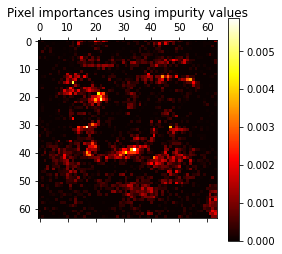

In [6]:
import time
import matplotlib.pyplot as plt

start_time = time.time()
img_shape = data.images[0].shape
importances = forest.feature_importances_
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
imp_reshaped = importances.reshape(img_shape)
plt.matshow(imp_reshaped, cmap=plt.cm.hot)
plt.title("Pixel importances using impurity values")
plt.colorbar()
plt.show()

Pouvez-vous encore reconnaître un visage ?

Les limitations de MDI ne sont pas un problème pour cet ensemble de données car :
1. Toutes les caractéristiques sont numériques (ordonnées) et ne subiront donc pas le biais de cardinalité
2. Nous ne nous intéressons qu'à représenter les connaissances de la forêt acquises sur l'ensemble d'apprentissage.

Si ces deux conditions ne sont pas remplies, il est recommandé d'utiliser à la place [`permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance).